In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('processed_data.csv')
print(df.shape)
# print(df.columns)
df['zip_code'] = df['zip_code'].astype('object')
# print(df.value_counts())
# print(df.dtypes)

(331455, 30)


In [3]:
# def corrX_orig(some_data, cut) :
        
#     # Get correlation matrix and upper triagle
#     corr_mtx = some_data.corr().abs()
#     avg_corr = corr_mtx.mean(axis = 1)
#     up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
#     drop = list()

        
#     # For loop implements this pseudocode
#     # For every cell in the upper triangle: 
#         # If cell.value > 0.6: 
#                 # If mean(row_correlation) > mean(column_correlation):drop(column)
# 		# Else: drop(row)
#     for row in range(len(up)-1):
#         col_idx = row + 1
#         for col in range (col_idx, len(up)):
#             if(corr_mtx.iloc[row, col] > cut):
#                 if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
#                     drop.append(row)
#                 else: 
#                     drop.append(col)
    
#     drop_set = list(set(drop))
#     # dropcols_idx = drop_set
#     dropcols_names = list(some_data.columns[[item for item in drop_set]])
    
#     return(dropcols_names)

In [4]:
data = pd.get_dummies(df)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [5]:
# drop = corrX_orig(data, cut = 0.85)
# data = data.drop(drop, axis =1)
feature_cols =data.columns.drop('intime')

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.intime))
# n_splits number of reshuffling max 10

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'intime']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'intime']

In [7]:
#scale the features
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(265164, 397)
(265164,)
(66291, 397)
(66291,)


In [9]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [10]:
y_pred = svc.predict(X_test_scaled)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Make predictions on the test set
y_pred = svc.predict(X_test_scaled)

# Calculate the accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy,3)}')
print(f"Precision = {round(precision,3)}")
print(f"Recall = {round(recall,3)}")
print(f"F1 Score = {round(f1score,3)}")

Accuracy: 0.836
Precision = 0.873
Recall = 0.818
F1 Score = 0.845


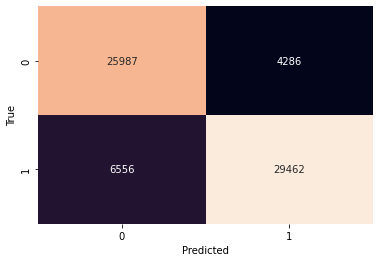

In [13]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred, labels=[1, 2])

# Create a DataFrame from the confusion matrix
# cm_df = pd.DataFrame(cm, index=[1, 2], columns=[1, 2])

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.show()
plt.savefig("figs/confusion_svm.pdf", format="pdf", bbox_inches="tight")